## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

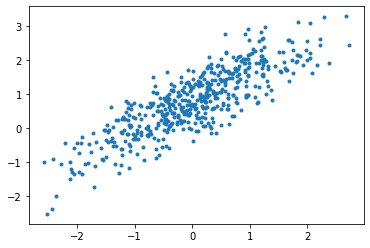

In [4]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [59]:
def model(x_test):
  var = np.var(x_train)
  # initialize the starting value with normal r.v
  m, c = np.random.normal(0, var), np.random.normal(0, var)
  learning_rate = 2e-3
  iteration = 1000
  for i in range(iteration):
    n = x_train.size

    # prediction list of y
    y = (m*x_train + c) 

    # loss function determined by MSE
    loss = np.sum((y-y_train)**2) / n

    # plot iteration-loss graph 
    plt.plot(i, loss, '.') 

    # gradient of m after partial derivative
    gradient_m = (2/n) * np.sum(x_train*(y-y_train))

    # gradient of c after partial derivative
    gradient_c = (2/n) * np.sum(y-y_train)

    # renew m 
    m -= learning_rate * gradient_m 
    
    # renew c
    c -= learning_rate * gradient_c 
  print("weight: %f, intecept: %f" %(m, c))
  return m*x_test + c


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [18]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

weight: 0.816531, intecept: 0.788410


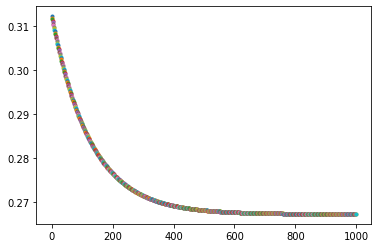

In [60]:
y_pred = model(x_test)

In [63]:
# MSE of prediction and ground truth
mse = np.sum((y_pred-y_test)**2) / x_test.size 
print("MSE: %f" %(mse))

MSE: 0.069171
